In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

In [37]:
# plt.style.use('seaborn-talk')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 2

In [33]:
plt.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backen

In [5]:
df = pd.read_csv('../data/sea_all_years.csv')

/Users/cf/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = df.drop('Unnamed: 0.1', axis=1)

In [6]:
# Function to check what percentage of each column is null
def checknulls(df):
    total = len(df)
    for c in df.columns.values:
        notnull = pd.notnull(df[c])
        selected = df.ix[notnull, c]
        print c, selected.count() / float(total)

In [3]:
destinations = set(df.ix[df['Origin'] == 'SEA', 'Dest'].unique())

In [4]:
origins = set(df.ix[df['Dest'] == 'SEA', 'Origin'].unique())

In [7]:
airports = list(destinations.union(origins))

In [8]:
print airports

['JFK', 'SIT', 'MIA', 'BOS', 'OAK', 'BOI', 'PIH', 'SAN', 'DCA', 'BWI', 'PIT', 'SAT', 'IAH', 'TPA', 'IAD', 'CHS', 'BNA', 'JAC', 'JNU', 'PHL', 'SNA', 'SFO', 'PHX', 'LAX', 'ONT', 'LAS', 'FLL', 'DEN', 'SMF', 'HDN', 'MWH', 'DTW', 'BUR', 'MFR', 'GEG', 'BDL', 'YKM', 'DSM', 'BLI', 'EWR', 'RNO', 'ANC', 'PSC', 'OKC', 'IND', 'PSP', 'COS', 'ATL', 'HNL', 'BZN', 'SLC', 'MDW', 'RDU', 'PDX', 'CLE', 'DFW', 'AUS', 'RDM', 'SJC', 'OMA', 'MEM', 'TUS', 'CDV', 'SBA', 'ORD', 'MKE', 'TWF', 'MSY', 'KOA', 'LWS', 'MSP', 'MSO', 'CVG', 'BIL', 'DAL', 'FAT', 'CLT', 'FAI', 'EUG', 'LIH', 'STL', 'ABQ', 'KTN', 'HOU', 'ICT', 'MCO', 'MCI', 'LGB', 'OGD', 'OGG']


In [9]:
import cPickle as pickle

In [11]:
with open('airports.pkl', 'w') as f:
    pickle.dump(airports, f)   

In [7]:
#checknulls(df)

In [8]:
# Drop a couple of columns, see what happens

In [7]:
df = df.dropna(axis=0, subset=['ArrTime', 'ArrDelay', 'DepDelay', 'DepTime', 'ActualElapsedTime', 'CRSElapsedTime', 'Distance'])

In [8]:
dates = df.ix[:, ['Year', 'Month', 'DayofMonth']]
dates.columns = ['year', 'month', 'day']

In [9]:
dates = pd.to_datetime(dates, infer_datetime_format=True)

In [10]:
df['Date'] = dates

In [11]:
df.head(1).T

,0
Unnamed: 0,0
ActualElapsedTime,147
AirTime,NaN
ArrDelay,-4
ArrTime,926
CRSArrTime,930
CRSDepTime,700
CRSElapsedTime,150
CancellationCode,NaN
Cancelled,0


In [ ]:
date_delays = df.ix[(df['Date'] > '1988-01-01') & (df['Date'] < '2016-08-01'), ['Date', 'DepDelay']].groupby('Date').mean()['DepDelay']
date_delay_counts = df.ix[(df['Date'] > '2009-01-25') & (df['Date'] < '2009-04-01'), ['DayOfWeek', 'DepDelay']].groupby('DayOfWeek').count()['DepDelay']

In [12]:
def date_num_select(df, col, start, end):
    return df.ix[(df['Date'] > start) & (df['Date'] < end), ['Date', col]].groupby('Date').mean()[col]

/Users/cf/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


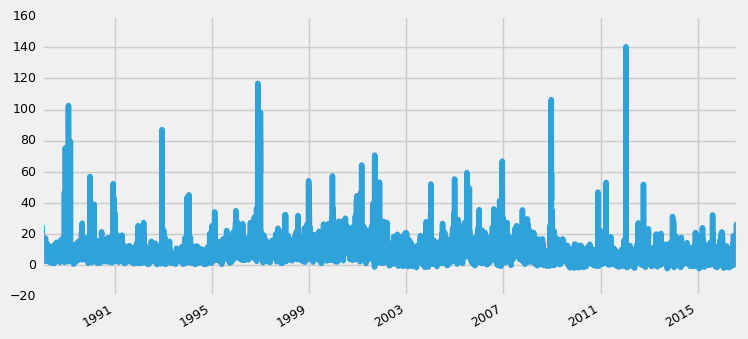

In [13]:

fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.ylabel = 'Avg. Departure Delay'
plt.plot(date_num_select(df, 'DepDelay', '1985-01-01', '2016-09-01'))
plt.show()

In [14]:
# Delays look unsusprising, for the most part. 
# Let's look at those spikes after 2007...

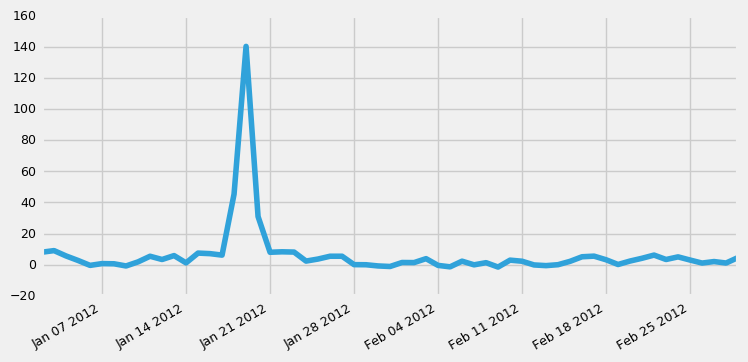

In [15]:
# This one was a snow/ice storm on Jan. 18-19 2012
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '2012-01-01', '2012-03-01'))

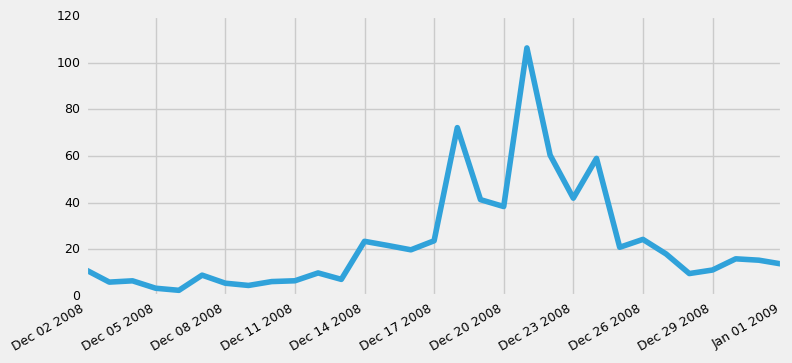

In [16]:
# Unusually severe snowfall occurred in December 2008.
# These two weather events in '08 and '12 indicate that SeaTac is quite sensitive to snow.
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '2008-12-01', '2009-01-02'))

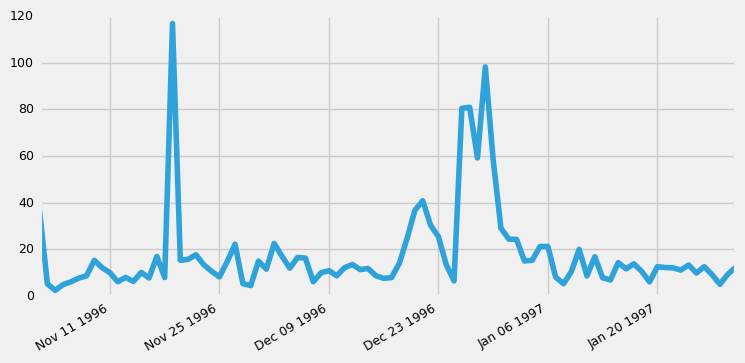

In [17]:
# One More...
# Another couple snow storms, one in a series in December '96 - January '97, one isolated ice storm in November '96
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '1996-11-01', '1997-01-31'))

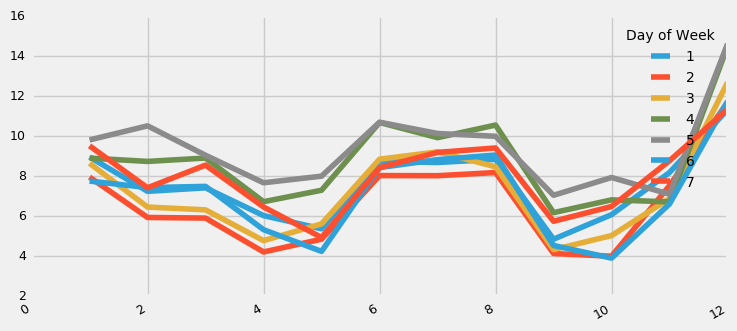

In [18]:
# Let's look at day of week effects, for each month.

fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
for d in xrange(1, 8):
    delays = df.ix[df['DayOfWeek']==d, ['Month', 'DepDelay']].groupby('Month').mean()
    ax.plot(delays, label=d)
plt.legend(title="Day of Week", framealpha=0)

plt.show()

xrange(13)

In [23]:
timeeffects = df.ix[:, ['Month', 'DayOfWeek', 'DepDelay']].groupby(['Month', 'DayOfWeek']).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117eecad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bb77dd0>], dtype=object)

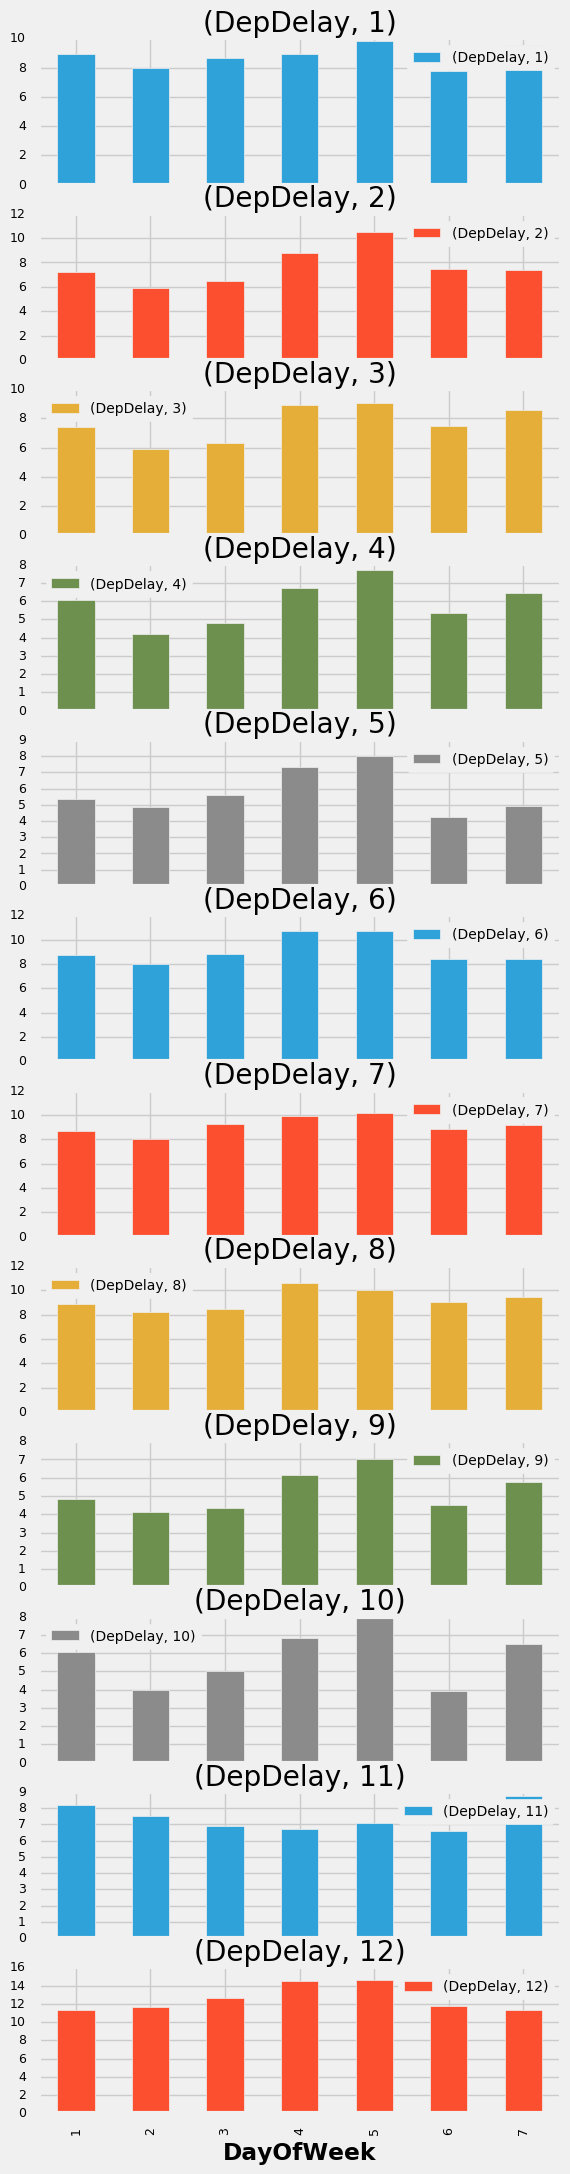

In [24]:
timeeffects.unstack(level=0).plot(kind='bar', subplots=True, figsize=(6, 25))

In [74]:
# Carrier effects - departing Seattle

In [19]:
df_origin_sea = df.ix[df['Origin'] == 'SEA', :]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1211cdf10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120cffc10>], dtype=object)

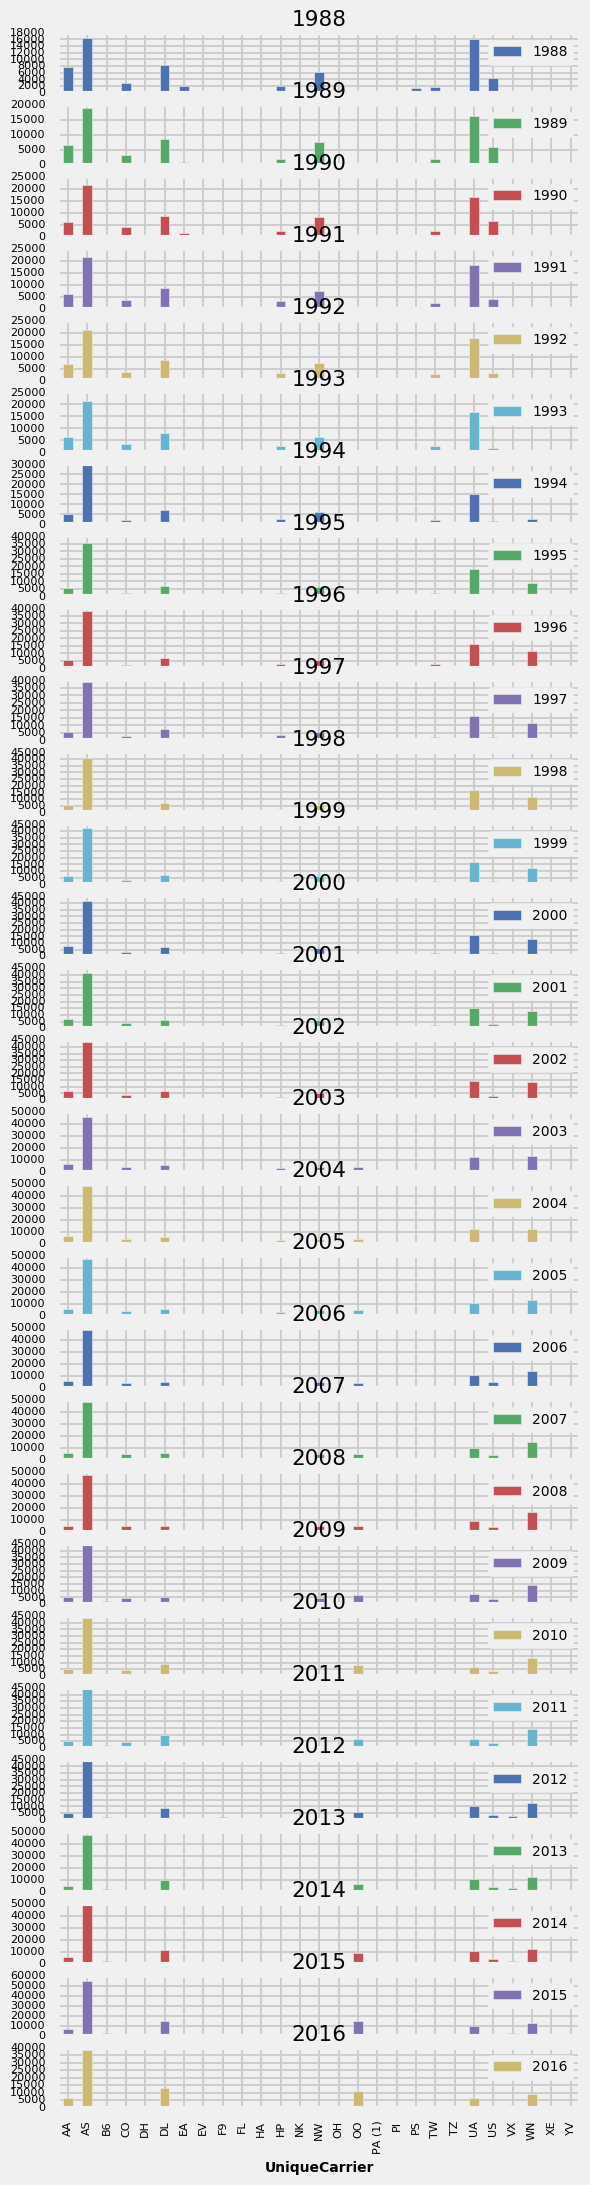

In [81]:
carriereffects = df_origin_sea.groupby(['Year', 'UniqueCarrier']).count()['DepDelay']
carriereffects.unstack(level=0).plot(kind='bar', subplots=True, figsize=(6, 25))

In [22]:
# Look at effect of being on an Alaska flight (any priority? or congestion perhaps?)

df_origin_sea['Alaska'] = df_origin_sea['UniqueCarrier'] == 'AS'

/Users/cf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [23]:
df_origin_sea.index= df_origin_sea.Date

In [24]:
AS_effects = df_origin_sea.ix[df_origin_sea['Date'] > '1999-01-01', :].groupby(['Alaska', pd.TimeGrouper(freq='M')]).mean()['DepDelay']

None


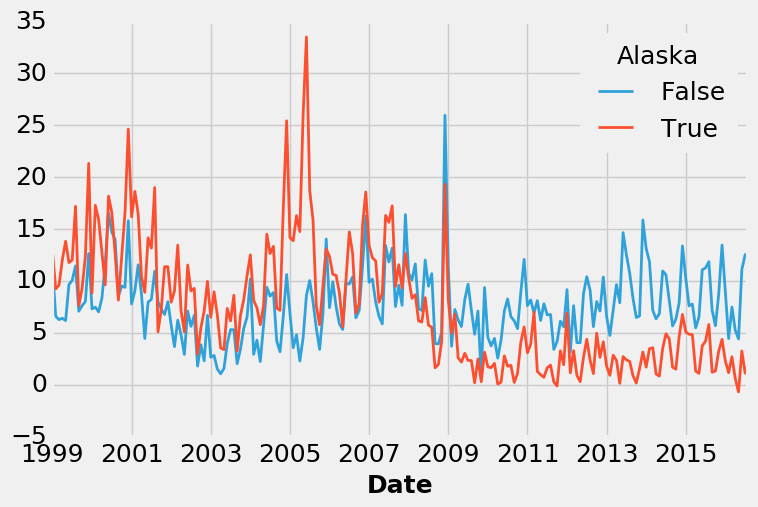

In [60]:
pt = AS_effects.unstack(level=0).plot(kind='line', figsize=(8,5))

plt.show()
plt.savefig('runwayeffect.png')

In [61]:
pd.unique(df_origin_sea['UniqueCarrier'])

array(['PS', 'TW', 'UA', 'HP', 'NW', 'PA (1)', 'PI', 'CO', 'DL', 'EA',
       'AA', 'AS', 'US', 'WN', 'OO', 'TZ', 'B6', 'HA', 'OH', 'EV', 'F9',
       'DH', 'YV', 'FL', 'XE', 'VX', 'NK'], dtype=object)

In [159]:
top_airlines = df_origin_sea.ix[df_origin_sea['Year'] >= 2009,:].groupby('UniqueCarrier').count()['DepDelay'].sort_values(ascending=False).index[0:7]

In [169]:
AS_only = df_origin_sea.ix[(df_origin_sea['Date'] > '2009-01-01') & 
                           (df_origin_sea['UniqueCarrier'].isin(top_airlines)), :].groupby(['UniqueCarrier', 
                                                                                            pd.TimeGrouper(freq='A')]).mean()[['DepDelay']]


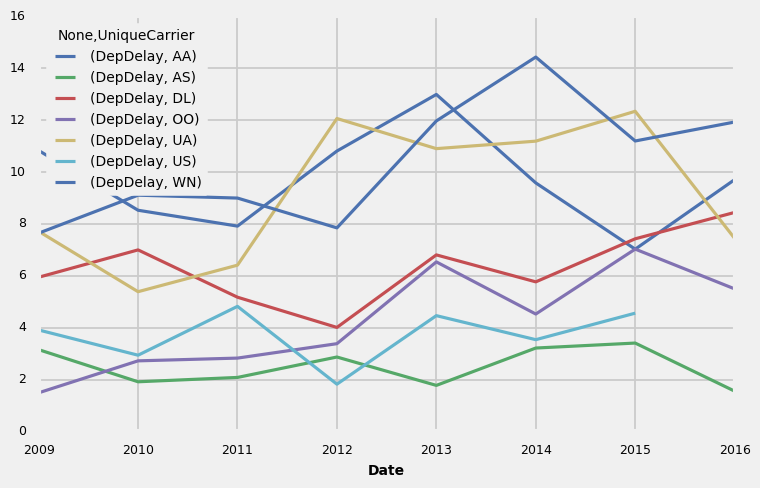

In [170]:
AS_only.unstack(level=0).plot(kind='line', figsize=(8, 5))
plt.figlegend = []

In [12]:
ls

EDA_early.ipynb                 runwayeffect.png
RandomFrst_and_Regressor.ipynb  sea_data_with_datetime.csv


In [48]:
with open('../src/airport_info.pkl', 'r') as f:
    d = pickle.load(f)

In [32]:
pd.DataFrame([['_',0, 0, 0]], columns=['Airport', 'Year', 'AvgDepDelay', 'AvgArrDelay'])

,Airport,Year,AvgDepDelay,AvgArrDelay
0,_,0,0,0


In [54]:
d['AvgDepDelay'] = pd.to_numeric(d.AvgDepDelay, errors='coerce')
d['AvgArrDelay'] = pd.to_numeric(d.AvgArrDelay, errors='coerce')

In [55]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 521
Data columns (total 4 columns):
AvgDepDelay    522 non-null float64
AvgArrDelay    522 non-null float64
Airport        522 non-null object
Delay_Yr       522 non-null object
dtypes: float64(2), object(2)
memory usage: 20.4+ KB


In [59]:
d_airport_delays = d.groupby('Airport').mean().reset_index()

In [60]:
with open('../data/airport_delays.pkl', 'w') as f:
    pickle.dump(d_airport_delays, f)

In [61]:
d_airport_delays

,Airport,AvgDepDelay,AvgArrDelay
0,ABQ,54.163333,48.535000
1,ANC,55.051667,47.826667
2,ATL,54.498333,63.111667
3,AUS,59.060000,54.806667
4,BDL,59.265000,54.745000
5,BIL,67.391667,51.233333
6,BLI,76.995000,46.788333
7,BNA,56.675000,53.656667
8,BOI,64.146667,51.810000
9,BOS,60.816667,58.536667
